In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import seaborn as sns
sns.set()
%matplotlib inline

In [99]:
data = pd.read_csv("./data/UN.csv")
print(data.columns)
data

#Para ver la relación entre las variable podemos usar
#sns.pairplot(data)
#Que grafica scatter plots e histogramas de cada variable.

Index(['country', 'region', 'tfr', 'contraception', 'educationMale',
       'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita', 'economicActivityMale', 'economicActivityFemale',
       'illiteracyMale', 'illiteracyFemale'],
      dtype='object')


,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.000
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.000
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.360
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,Africa,6.69,NaN,NaN,NaN,44.9,48.1,124,355,NaN,NaN,NaN,NaN
6,Antigua,America,NaN,53,NaN,NaN,NaN,NaN,24,6966,74.4,56.2,NaN,NaN
7,Argentina,America,2.62,NaN,NaN,NaN,69.6,76.8,22,8055,76.2,41.3,3.800,3.800
8,Armenia,Europe,1.70,22,NaN,NaN,67.2,74.0,25,354,65.0,52.0,0.300,0.500
9,Australia,Oceania,1.89,76,16.3,16.1,75.4,81.2,6,20046,74.0,53.8,NaN,NaN


In [109]:
#Habiendo analizado los datos, se elige las siguientes features, y se elimina las entradas con NA
features = ["country", "lifeMale", "lifeFemale", "GDPperCapita", "infantMortality"]
data = data[features].copy()
data.dropna(inplace=True)
X = data[data.columns[1:]] #Me deshago del país, estos son los datos a modelizar

In [107]:
km = KMeans(3, init='k-means++') # initialize
#dtf = model.fit_transform(X)
#plt.scatter(x=dtf[:,0],y=dtf[:,1], cmap = plt.cm.get_cmap("RdYlGn"))
#plt.plot(data[c==0]["lifeMale"],data[c==0]["GDPperCapita"],'ro')
#plt.plot(data[c==1]["lifeMale"],data[c==1]["GDPperCapita"],'go')
#plt.plot(data[c==2]["lifeMale"],data[c==2]["GDPperCapita"],'bo')

Para encontrar significado a los datos, podemos reducir las dimensiones, pero en este caso no tiene mucho sentido o generar clusters de datos, que permite separar en diferentes casos. El método de K-Means necesita a priori saber la cantidad de clusters, para lo cual vamos a usar el método del codo

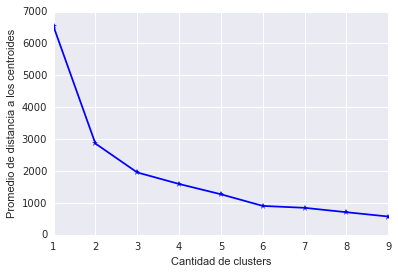

In [116]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K] #Listas de modelos, todos con un k diferente.
centroids = [k.cluster_centers_ for k in KM]  #Centros de los clusters, donde voy a definir distancia

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]  #Distancias de los puntos a los centros
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist] #Promedio pesado en la cantidad de datos


#Acá graficamos laa distancia promedio frente a la cantidad de clusters.
fig = plt.figure()
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Promedio de distancia a los centroides');

C:\Users\sadeus\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\sadeus\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.set_edgecolor(c)


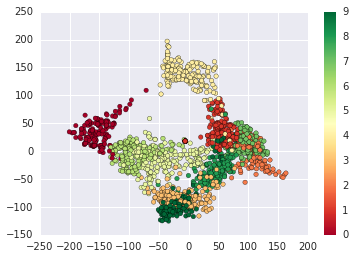

In [87]:
digits = load_digits()
digits.data.shape
model = Isomap(n_components=2)
model.fit(digits.data)
dtf = model.fit_transform(digits.data)
plt.scatter(x=dtf[:,0],y=dtf[:,1], c = digits.target, cmap = plt.cm.get_cmap("RdYlGn"))
plt.colorbar()